Diskon yang diberikan: 13.19%


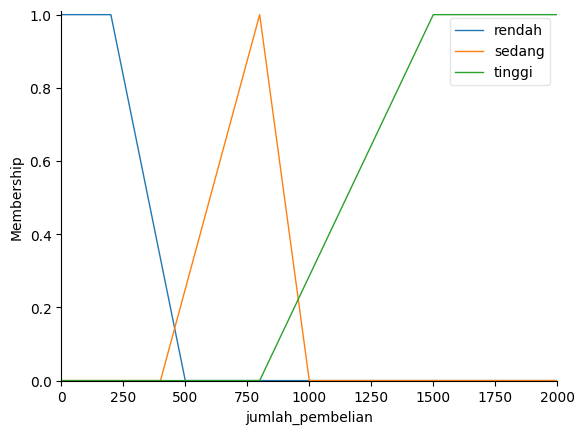

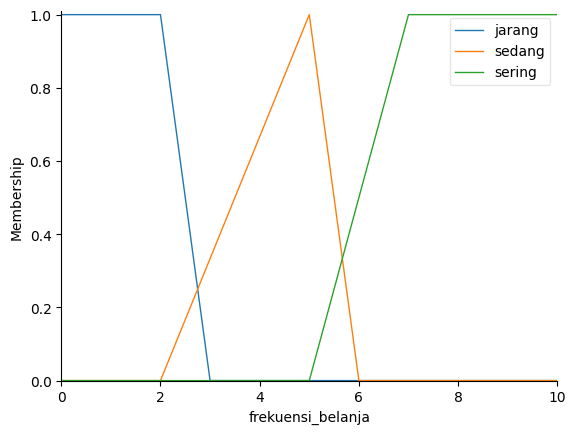

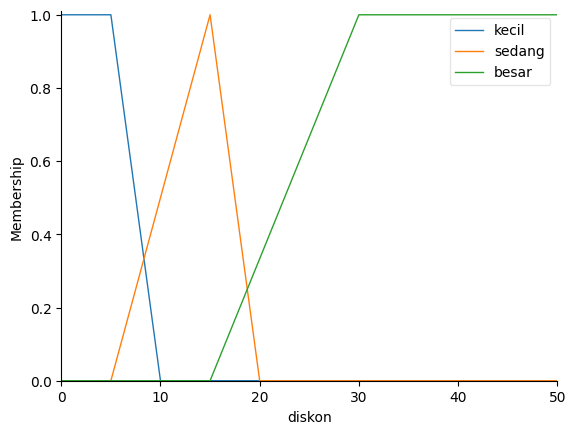

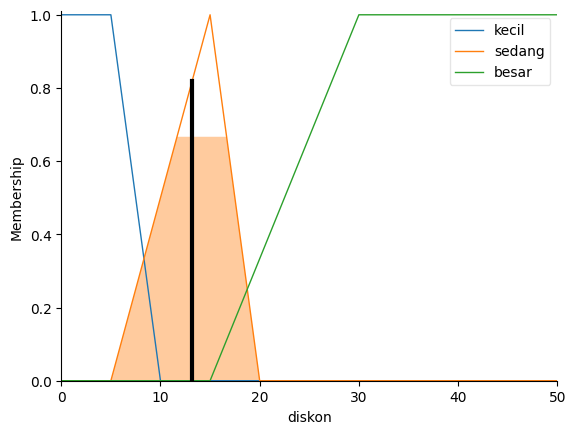

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Definisi variabel fuzzy
jumlah_pembelian = ctrl.Antecedent(np.arange(0, 2001, 1), 'jumlah_pembelian')
frekuensi_belanja = ctrl.Antecedent(np.arange(0, 11, 1), 'frekuensi_belanja')
diskon = ctrl.Consequent(np.arange(0, 51, 1), 'diskon')

# Fungsi keanggotaan
jumlah_pembelian['rendah'] = fuzz.trapmf(jumlah_pembelian.universe, [0, 0, 200, 500])
jumlah_pembelian['sedang'] = fuzz.trimf(jumlah_pembelian.universe, [400, 800, 1000])
jumlah_pembelian['tinggi'] = fuzz.trapmf(jumlah_pembelian.universe, [800, 1500, 2000, 2000])

frekuensi_belanja['jarang'] = fuzz.trapmf(frekuensi_belanja.universe, [0, 0, 2, 3])
frekuensi_belanja['sedang'] = fuzz.trimf(frekuensi_belanja.universe, [2, 5, 6])
frekuensi_belanja['sering'] = fuzz.trapmf(frekuensi_belanja.universe, [5, 7, 10, 10])

diskon['kecil'] = fuzz.trapmf(diskon.universe, [0, 0, 5, 10])
diskon['sedang'] = fuzz.trimf(diskon.universe, [5, 15, 20])
diskon['besar'] = fuzz.trapmf(diskon.universe, [15, 30, 50, 50])

# Aturan fuzzy
rule1 = ctrl.Rule(jumlah_pembelian['rendah'] & frekuensi_belanja['jarang'], diskon['kecil'])
rule2 = ctrl.Rule(jumlah_pembelian['rendah'] & frekuensi_belanja['sering'], diskon['sedang'])
rule3 = ctrl.Rule(jumlah_pembelian['tinggi'] & frekuensi_belanja['sering'], diskon['besar'])
rule4 = ctrl.Rule(jumlah_pembelian['sedang'] & frekuensi_belanja['sedang'], diskon['sedang'])
rule5 = ctrl.Rule(jumlah_pembelian['tinggi'] & frekuensi_belanja['jarang'], diskon['sedang'])
rule6 = ctrl.Rule(jumlah_pembelian['sedang'] & frekuensi_belanja['jarang'], diskon['kecil'])
rule7 = ctrl.Rule(jumlah_pembelian['rendah'] & frekuensi_belanja['sedang'], diskon['kecil'])
rule8 = ctrl.Rule(jumlah_pembelian['tinggi'] & frekuensi_belanja['sedang'], diskon['besar'])

# Sistem kontrol fuzzy
fuzzy_discount_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
fuzzy_discount = ctrl.ControlSystemSimulation(fuzzy_discount_ctrl)

# Input data
fuzzy_discount.input['jumlah_pembelian'] = 750
fuzzy_discount.input['frekuensi_belanja'] = 4

# Komputasi fuzzy
fuzzy_discount.compute()

# Hasil diskon
print(f"Diskon yang diberikan: {fuzzy_discount.output['diskon']:.2f}%")

# Plot fungsi keanggotaan
jumlah_pembelian.view()
frekuensi_belanja.view()
diskon.view()

# Plot hasil akhir
diskon.view(sim=fuzzy_discount)
plt.show()
